In [ ]:
import numpy as np
import pylab as plt
import networkx as nx #python package to generate graphs

# defining the edges between states 
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

#defining the goal
goal = 7

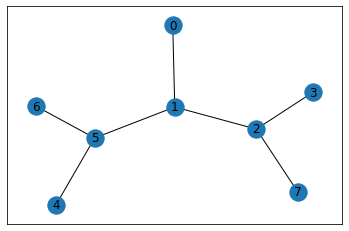

In [ ]:
#plotting the maze 
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

**R** **Table**

In [ ]:
# matrix size is defined as the number of states in the maze 
MATRIX_SIZE = 8

In [ ]:
# R table created and initiates with -1s. 
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [ ]:
#defining reards based on points list
for point in points_list:
    if point[1] == goal: 
        R[point] = 100
    else:
        R[point] = 0 

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]= 0

R[goal,goal]= 100 

R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

**Q** **Table**

In [ ]:
#initializing the Q table
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE])) 

# learning parameter
gamma = 0.8

initial_state = 1 

In [ ]:
#function to select available actions for a state
def available_actions(state):  
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

In [ ]:
#function to select the next action out of available actions 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

In [ ]:
# function to update the q table with the reward value
def update(current_state, action, gamma): 

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]       

  Q[current_state, action] = R[current_state, action] + gamma * max_value

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

0

**Training**

In [ ]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_act = available_actions(current_state)
    action = sample_next_action(available_act) 
    score = update(current_state,action,gamma) 
    scores.append(score)

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.         64.          0.          0.          0.          0.
    0.          0.       ]
 [ 51.2         0.         80.          0.          0.         51.2
    0.          0.       ]
 [  0.         64.          0.         64.          0.          0.
    0.        100.       ]
 [  0.          0.         80.          0.          0.          0.
    0.          0.       ]
 [  0.          0.          0.          0.          0.         51.2
    0.          0.       ]
 [  0.         64.          0.          0.         40.96        0.
   40.96        0.       ]
 [  0.          0.          0.          0.          0.         51.2
    0.          0.       ]
 [  0.          0.         80.          0.          0.          0.
    0.         99.9986388]]


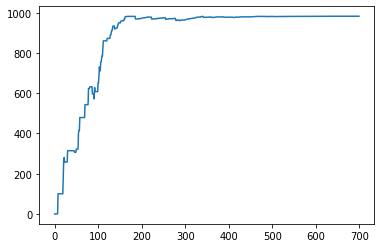

In [ ]:
plt.plot(scores)
plt.show()

**Testing** 

In [ ]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]
